In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBRegressor
from xgboost import XGBClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

# Path of file to read
data_path = 'CollegeBasketballPlayers2009-2021.csv'
total_ball_data = pd.read_csv(data_path, low_memory = False)

# Only include rows in which a player was drafted, and before 2021 (2021 will be used as test data)
# pick number bigger than 1 cause draft number (1-60)
# 64 zmiennych objasniajacych i 1 zmienna objasniana
ball_data_1 = total_ball_data.loc[total_ball_data['pick'] >= 1]
ball_data = ball_data_1.loc[ball_data_1['year'] < 2021]

In [36]:
num_nan = ball_data.isnull().sum()
num_cols_with_missing = (num_nan > 0).sum()
num_cols_with_missing

13

In [38]:
ball_data

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
33,Charles Jenkins,Hofstra,CAA,31,86.2,104.3,30.8,43.1,50.76,2.7,11.9,32.6,18.5,183,223,0.821,166,396,0.419,30,94,0.319,1.4,2.4,45.5,So,3-Jun,NaN,4.021670,117.8840,3.1,2009,57,all,NaN,1.276195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,97.5891,98.6127,3.30834,199.3900,3.422580,2.775530,0.647047,4.614900,35.0323,3.448400,1.166500,0.9032,3.8387,4.7419,4.3226,1.4194,0.4516,19.5161,NaN,5.09412
100,Ryan Reid,Florida St.,ACC,35,47.4,82.0,19.7,44.0,48.56,9.5,12.4,7.9,32.2,48,76,0.632,62,141,0.440,0,0,0.000,3.8,2.0,53.9,Jr,8-Jun,NaN,0.032054,84.7537,4.2,2009,193,all,82.0,0.361139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,95.6378,89.4357,2.42557,125.8340,0.297536,-3.124070,3.421610,-0.868858,19.1143,-2.977750,2.108890,1.4857,2.2286,3.7143,0.7429,0.6571,0.6571,4.9143,NaN,0.00000
102,Kyle Singler,Duke,ACC,37,80.4,111.8,26.0,51.4,54.90,10.6,16.7,15.5,17.0,124,174,0.713,139,292,0.476,69,180,0.383,3.1,2.8,36.9,So,8-Jun,NaN,4.714590,126.5120,3.3,2009,197,all,99.0,0.967384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,92.1514,86.4901,4.43913,255.6060,9.729550,6.100490,3.629060,9.212470,32.2703,6.739510,2.472960,3.0270,4.6486,7.6757,2.4054,1.5405,1.0270,16.4595,NaN,8.66581
103,Nolan Smith,Duke,ACC,34,49.5,105.3,20.6,48.5,53.84,3.5,8.0,15.2,20.9,62,73,0.849,71,152,0.467,27,78,0.346,0.3,2.5,31.7,So,2-Jun,NaN,2.015530,111.2350,3.8,2009,198,all,95.8,1.054587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,97.6446,92.0009,2.56099,124.6440,2.858910,2.196600,0.662308,2.655750,21.6176,1.067750,1.588000,0.6765,1.5000,2.1765,1.7059,0.9412,0.0588,8.3824,NaN,6.09933
104,E'Twaun Moore,Purdue,B10,37,81.9,98.4,25.1,48.5,51.73,3.9,12.1,19.8,19.2,80,105,0.762,132,279,0.473,56,166,0.337,1.4,2.0,23.6,So,4-Jun,NaN,2.943050,110.1650,3.0,2009,201,all,95.0,1.144339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,91.8836,87.4982,4.40566,218.3140,4.885350,2.358840,2.526520,4.350620,33.0811,2.376390,1.974240,1.0541,3.5676,4.6216,3.0000,1.0811,0.4324,13.8378,NaN,8.24212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55828,Jeremiah Robinson-Earl,Villanova,BE,31,81.3,105.7,19.8,49.6,55.24,9.1,23.2,11.2,20.2,79,97,0.814,92,185,0.497,21,64,0.328,1.7,2.0,39.0,Fr,9-Jun,24,2.915150,111.1790,2.8,2020,71861,all,97.0,0.882380,75.0,121.0,17.0,64.0,0.6198,0.2656,16.0,18.0,0.8889,32.0,93.9931,88.4744,4.38508,219.0130,5.584480,1.604060,3.980420,4.370300,32.6452,1.813250,2.557050,2.5484,6.8065,9.3548,1.9355,1.1290,0.5484,10.5161,Stretch 4,3.75558
55841,Anthony Edwards,Georgia,SEC,31,81.3,103.0,28.8,47.0,51.73,2.4,14.5,17.9,15.4,127,165,0.770,126,251,0.502,69,237,0.291,1.6,2.3,33.8,Fr,5-Jun,5,3.753330,118.5820,2.7,2020,71877,all,99.8,1.045976,89.0,129.0,37.0,122.0,0.6899,0.3033,27.0,27.0,1.0000,1.0,102.7740,98.2752,3.28191,198.3110,3.965190,3.541890,0.423291,4.928480,33.0312,4.385540,0.542943,0.7500,4.4688,5.2188,2.8438,1.3438,0.5625,19.0625,Wing G,12.79390
55859,Tyrese Maxey,Kentucky,SEC,31,85.4,104.7,22.1,47.4,53.06,1.4,12.1,18.3,16.6,100,120,0.833,117,238,0.492,33,113,0.292,1.3,1.5,34.2,Fr,3-Jun,3,3.061800,111.1590,2.8,2020,71900,all,98.2,1.447740,71.0,109.0,46.0,129.0,0.6514,0.3566,7.0,10.0,0.7000,21.0,98.2544,94.2306,3.92659,186.7240,4.109950,2.791540,1.318420,3.430910,34.4516,1.942460,1.488450,0.3871,3.9032,4.2903,3.1290,0.8710,0.3871,13.9677,Combo G,6.19184
55863,Kai Jones,Texas,B12,27,36.5,99.7,13

In [37]:
null_columns = ball_data.columns[ball_data.isnull().any()]

# count number of columns with NaN values
num_null_columns = len(null_columns)

# print names of columns with NaN values
print("Columns with NaN values: ", list(null_columns))
print("Number of columns with NaN values: ", num_null_columns)

Columns with NaN values:  ['num', 'Rec Rank', 'ast/tov', 'rimmade', 'rimmade+rimmiss', 'midmade', 'midmade+midmiss', 'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade', 'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'Unnamed: 64']
Number of columns with NaN values:  13


Wszystkie 45 zmiennych

In [2]:
# Creates a target object for the pick and calls it y
y = ball_data.pick

# Creates X by using specific statistics
#features = ['Min_per', 'ftr', 'pts', 'ORB_per', 'DRB_per', 'blk_per', 'stl_per', 'dporpag', 'porpag', 'AST_per', 'TO_per', 'FT_per']
data = ball_data._get_numeric_data()
X = data.loc[:,data.columns!='pick']
X = X[X.columns[:-1]]
X=X.dropna(axis=1)
colnames=list(X)
display(X)
#X = ball_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,pid,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
33,31,86.2,104.3,30.8,43.1,50.76,2.7,11.9,32.6,18.5,183,223,0.821,166,396,0.419,30,94,0.319,1.4,2.4,45.5,4.021670,117.8840,3.1,2009,57,97.5891,98.6127,3.30834,199.3900,3.422580,2.775530,0.647047,4.614900,35.0323,3.448400,1.166500,0.9032,3.8387,4.7419,4.3226,1.4194,0.4516,19.5161
100,35,47.4,82.0,19.7,44.0,48.56,9.5,12.4,7.9,32.2,48,76,0.632,62,141,0.440,0,0,0.000,3.8,2.0,53.9,0.032054,84.7537,4.2,2009,193,95.6378,89.4357,2.42557,125.8340,0.297536,-3.124070,3.421610,-0.868858,19.1143,-2.977750,2.108890,1.4857,2.2286,3.7143,0.7429,0.6571,0.6571,4.9143
102,37,80.4,111.8,26.0,51.4,54.90,10.6,16.7,15.5,17.0,124,174,0.713,139,292,0.476,69,180,0.383,3.1,2.8,36.9,4.714590,126.5120,3.3,2009,197,92.1514,86.4901,4.43913,255.6060,9.729550,6.100490,3.629060,9.212470,32.2703,6.739510,2.472960,3.0270,4.6486,7.6757,2.4054,1.5405,1.0270,16.4595
103,34,49.5,105.3,20.6,48.5,53.84,3.5,8.0,15.2,20.9,62,73,0.849,71,152,0.467,27,78,0.346,0.3,2.5,31.7,2.015530,111.2350,3.8,2009,198,97.6446,92.0009,2.56099,124.6440,2.858910,2.196600,0.662308,2.655750,21.6176,1.067750,1.588000,0.6765,1.5000,2.1765,1.7059,0.9412,0.0588,8.3824
104,37,81.9,98.4,25.1,48.5,51.73,3.9,12.1,19.8,19.2,80,105,0.762,132,279,0.473,56,166,0.337,1.4,2.0,23.6,2.943050,110.1650,3.0,2009,201,91.8836,87.4982,4.40566,218.3140,4.885350,2.358840,2.526520,4.350620,33.0811,2.376390,1.974240,1.0541,3.5676,4.6216,3.0000,1.0811,0.4324,13.8378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55828,31,81.3,105.7,19.8,49.6,55.24,9.1,23.2,11.2,20.2,79,97,0.814,92,185,0.497,21,64,0.328,1.7,2.0,39.0,2.915150,111.1790,2.8,2020,71861,93.9931,88.4744,4.38508,219.0130,5.584480,1.604060,3.980420,4.370300,32.6452,1.813250,2.557050,2.5484,6.8065,9.3548,1.9355,1.1290,0.5484,10.5161
55841,31,81.3,103.0,28.8,47.0,51.73,2.4,14.5,17.9,15.4,127,165,0.770,126,251,0.502,69,237,0.291,1.6,2.3,33.8,3.753330,118.5820,2.7,2020,71877,102.7740,98.2752,3.28191,198.3110,3.965190,3.541890,0.423291,4.928480,33.0312,4.385540,0.542943,0.7500,4.4688,5.2188,2.8438,1.3438,0.5625,19.0625
55859,31,85.4,104.7,22.1,47.4,53.06,1.4,12.1,18.3,16.6,100,120,0.833,117,238,0.492,33,113,0.292,1.3,1.5,34.2,3.061800,111.1590,2.8,2020,71900,98.2544,94.2306,3.92659,186.7240,4.109950,2.791540,1.318420,3.430910,34.4516,1.942460,1.488450,0.3871,3.9032,4.2903,3.1290,0.8710,0.3871,13.9677
55863,27,36.5,99.7,13.2,54.6,56.10,7.1,15.8,4.3,23.3,14,22,0.636,31,52,0.596,7,24,0.292,6.8,1.9,28.9,0.553901,94.8552,4.7,2020,71905,92.1376,87.8445,2.29944,94.9982,5.047300,-0.872178,5.919480,3.566310,16.7778,-0.597038,4.163350,1.0000,2.2222,3.2222,0.3704,0.5185,1.1111,3.5926


In [3]:
# Create model
xgb = XGBRegressor(n_estimators=1200, learning_rate=0.106, max_depth=10, reg_lambda=1.1,tree_method='approx',random_state=1)

# Fit model
xgb.fit(train_X, train_y)

# Get predictions
xgb_preds = xgb.predict(val_X)

# Get MAE
xgb_mae = mean_absolute_error(xgb_preds, val_y)

print("XGB Validation MAE: {:,.5f}".format(xgb_mae))

XGB Validation MAE: 12.88948


XGBoost dluzej sie liczy niz RandomForest ale zwraca mniejszy bląd.

In [4]:
# Test data, using 2021
ball_data_2021 = ball_data_1.loc[ball_data_1['year'] == 2021]
test_X_2021 = ball_data_2021[colnames]

# Make predictions
test_preds_xgb = xgb.predict(test_X_2021)

# Find MAE
test_mae_xgb = mean_absolute_error(test_preds_xgb, ball_data_2021.pick)

print("2021 XGB Test MAE: {:,.5f}".format(test_mae_xgb))

2021 XGB Test MAE: 14.34237


In [6]:
# Save predictions in right format
output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': test_preds_xgb, 'Actual Pick' : ball_data_2021.pick})
output = output.astype({'Pick':'int'})
output = output.astype({'Actual Pick':'int'})
#output.to_csv('xgbpredictions2021.csv', index=False)
output

,Name,Pick,Actual Pick
56447,Isaiah Livers,29,42
56525,Sandro Mamukelashvili,26,54
56715,Corey Kispert,13,15
56789,Jericho Sims,28,58
56817,Davion Mitchell,20,9
56884,Luka Garza,21,52
56945,Herbert Jones,30,35
57079,Marcus Zegarowski,41,49
57132,Quentin Grimes,31,25
57199,Trey Murphy III,26,17


Check importance of features in XGBoost

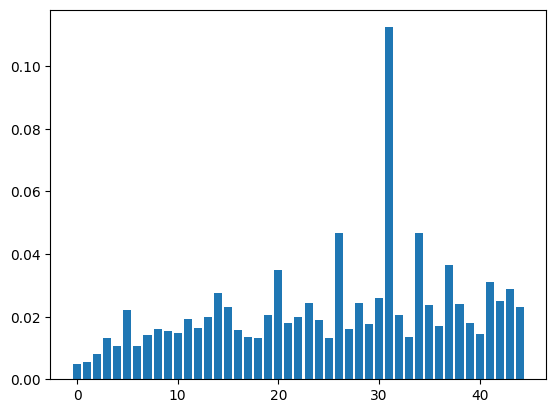

In [15]:
importance = xgb.feature_importances_
importancedf = pd.DataFrame(columns=['Feature', 'Score'])
# summarize feature importance
for i,v in enumerate(importance):
 #print('Feature: %0d, Score: %.5f' % (i,v))
    importancedf = importancedf.append({'Feature':i, 'Score':v}, ignore_index=True)
    importancedf = importancedf.astype({'Feature':'int'})
#print(importancedf)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Choose top 11 features with highest importance

In [16]:
featurelist = list(X)

featuresdf = pd.DataFrame({'Feature': importancedf.iloc[:,0], 'Name': featurelist, 'Score':importancedf.iloc[:,1]})
featuresdf = featuresdf.sort_values(by=['Score'], ascending=False)
featuresdf.head(11)

,Feature,Name,Score
31,31,bpm,0.112471
34,34,gbpm,0.046772
26,26,pid,0.046708
37,37,dgbpm,0.036452
20,20,stl_per,0.034852
41,41,ast,0.030971
43,43,blk,0.028930
14,14,twoPA,0.027618
30,30,stops,0.025931
42,42,stl,0.025140


In [17]:
# Creates a target object for the pick and calls it y
y = ball_data.pick

# Creates X by using specific statistics
features = ['bpm', 'gbpm', 'pid', 'dgbpm', 'stl_per', 'ast', 'blk', 'twoPA', 'stops', 'stl', 'adrtg']
Xnew = ball_data[features]

# Split into validation and training data
train_Xnew, val_Xnew, train_y, val_y = train_test_split(Xnew, y, random_state=1)

In [18]:
# Create model
xgb = XGBRegressor(n_estimators=1200, learning_rate=0.106, max_depth=10, reg_lambda=1.1,tree_method='approx',random_state=1)

# Fit model
xgb.fit(train_Xnew, train_y)

# Get predictions
xgb_preds = xgb.predict(val_Xnew)

# Get MAE
xgb_mae = mean_absolute_error(xgb_preds, val_y)

print("XGB Validation MAE: {:,.5f}".format(xgb_mae))

XGB Validation MAE: 13.67297


In [21]:
# Test data, using 2021
ball_data_2021 = ball_data_1.loc[ball_data_1['year'] == 2021]
test_X_2021 = ball_data_2021[features]

# Make predictions
test_preds_2021 = xgb.predict(test_X_2021)

# Find MAE
test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)

print("2021 Test MAE: {:,.5f}".format(test_mae_2021))

# Save predictions in right format
output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': test_preds_2021, 'Actual Pick' : ball_data_2021.pick})
#output.to_csv('predictions2021.csv', index=False)
output = output.astype({'Pick':'int'})
output = output.astype({'Actual Pick':'int'})
output


2021 Test MAE: 14.42819


,Name,Pick,Actual Pick
56447,Isaiah Livers,15,42
56525,Sandro Mamukelashvili,37,54
56715,Corey Kispert,17,15
56789,Jericho Sims,32,58
56817,Davion Mitchell,14,9
56884,Luka Garza,13,52
56945,Herbert Jones,26,35
57079,Marcus Zegarowski,39,49
57132,Quentin Grimes,14,25
57199,Trey Murphy III,32,17


In [22]:
# Test data, using 2021
ball_data_2021 = ball_data_1.loc[ball_data_1['year'] == 2021]
test_X_2021 = ball_data_2021[features]

# Make predictions
test_preds_2021 = xgb.predict(test_X_2021)

# Find MAE
test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)

print("2021 Test MAE: {:,.5f}".format(test_mae_2021))

# Save predictions in right format
output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': test_preds_2021, 'Actual Pick' : ball_data_2021.pick})
#output.to_csv('predictions2021.csv', index=False)
output = output.astype({'Pick':'int'})
output = output.astype({'Actual Pick':'int'})
output

2021 Test MAE: 14.42819


,Name,Pick,Actual Pick
56447,Isaiah Livers,15,42
56525,Sandro Mamukelashvili,37,54
56715,Corey Kispert,17,15
56789,Jericho Sims,32,58
56817,Davion Mitchell,14,9
56884,Luka Garza,13,52
56945,Herbert Jones,26,35
57079,Marcus Zegarowski,39,49
57132,Quentin Grimes,14,25
57199,Trey Murphy III,32,17


3rd method - SelectFromModel

In [ ]:
# Creates a target object for the pick and calls it y
y = ball_data.pick

# Creates X by using specific statistics
#features = ['Min_per', 'ftr', 'pts', 'ORB_per', 'DRB_per', 'blk_per', 'stl_per', 'dporpag', 'porpag', 'AST_per', 'TO_per', 'FT_per']
data = ball_data._get_numeric_data()
X = data.loc[:,data.columns!='pick']
X = X[X.columns[:-1]]
X=X.dropna(axis=1)

display(X)
#X = ball_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [27]:
y = ball_data.pick
model = XGBRegressor()  # Use XGBRegressor instead of XGBClassifier since we are predicting a continuous variable
for i in [5, 10, 15, 20]:
    sel = SelectFromModel(model, max_features=i)
    sel.fit(train_X, train_y)
    filter1 = sel.get_support()
    selected_feat = train_X.columns[(filter1)]
    print(len(selected_feat))
    print(list(selected_feat))

    XX = ball_data[list(selected_feat)]
    train_XX, val_XX, train_y, val_y = train_test_split(XX, y, random_state=1)

    # Specify an XGBoost model
    ball_model = XGBRegressor(max_depth=5, n_estimators=100, objective='reg:squarederror')  # Use XGBRegressor instead of DecisionTreeRegressor

    # Fit the model
    ball_model.fit(train_XX, train_y, verbose=False)

    # Make predictions on validation data and calculate the mean absolute error
    val_preds = ball_model.predict(val_XX)
    val_mae = mean_absolute_error(val_preds, val_y)
    print("Validation MAE: {:,.5f}".format(val_mae))

    # Test data, using 2021
    ball_data_2021 = ball_data_1.loc[ball_data_1['year'] == 2021]
    test_X_2021 = ball_data_2021[list(selected_feat)]

    # Make predictions
    test_preds_2021 = ball_model.predict(test_X_2021)

    # Find MAE
    test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)

    # Save predictions in right format
    output = pd.DataFrame({'Name': ball_data_2021.player_name, 'Pick': test_preds_2021, 'Actual Pick': ball_data_2021.pick})
    output.to_csv('predictions2021.csv', index=False)

    print("2021 Test MAE: {:,.5f}".format(test_mae_2021))





5
['FTA', 'pid', 'adrtg', 'bpm', 'gbpm']
Validation MAE: 12.67303
2021 Test MAE: 15.85123
10
['FTA', 'twoPA', 'adjoe', 'pfr', 'pid', 'adrtg', 'bpm', 'gbpm', 'ogbpm', 'blk']
Validation MAE: 13.83231
2021 Test MAE: 15.92689
15
['TO_per', 'FTA', 'twoPA', 'adjoe', 'pfr', 'year', 'pid', 'adrtg', 'stops', 'bpm', 'gbpm', 'ogbpm', 'ast', 'stl', 'blk']
Validation MAE: 12.99019
2021 Test MAE: 13.64602
17
['TO_per', 'FTA', 'twoPA', 'porpag', 'adjoe', 'pfr', 'year', 'pid', 'adrtg', 'stops', 'bpm', 'gbpm', 'ogbpm', 'dgbpm', 'ast', 'stl', 'blk']
Validation MAE: 12.93362
2021 Test MAE: 14.31175


Wykres walidacji i testu dla MAE

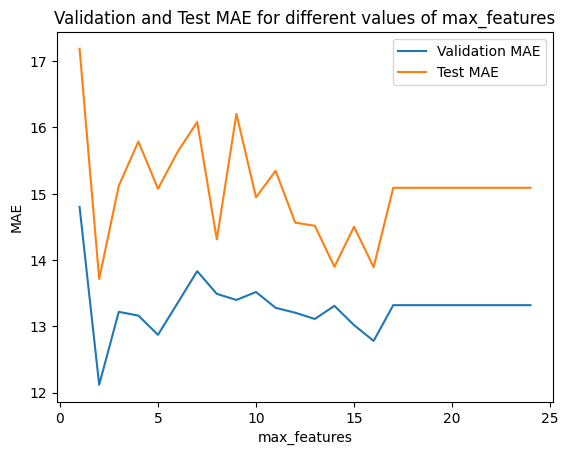

In [28]:
model = XGBRegressor(n_estimators=100, random_state=1)
max_features_values = range(1, 25)
val_mae_values = []
test_mae_values = []

for i in max_features_values:
    sel = SelectFromModel(model, max_features=i)
    sel.fit(train_X, train_y)
    filter1 = sel.get_support()
    selected_feat = train_X.columns[(filter1)]
    XX = ball_data[list(selected_feat)]
    train_XX, val_XX, train_y, val_y = train_test_split(XX, y, random_state=1)
    ball_model = XGBRegressor(n_estimators=100, random_state=1)
    ball_model.fit(train_XX, train_y, verbose=False)
    val_preds = ball_model.predict(val_XX)
    val_mae = mean_absolute_error(val_preds, val_y)
    val_mae_values.append(val_mae)
    # Test data, using 2021
    ball_data_2021 = ball_data_1.loc[ball_data_1['year'] == 2021]
    test_X_2021 = ball_data_2021[list(selected_feat)]
    test_preds_2021 = ball_model.predict(test_X_2021)
    test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)
    test_mae_values.append(test_mae_2021)

plt.plot(max_features_values, val_mae_values, label='Validation MAE')
plt.plot(max_features_values, test_mae_values, label='Test MAE')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('MAE')
plt.title('Validation and Test MAE for different values of max_features')
plt.show()

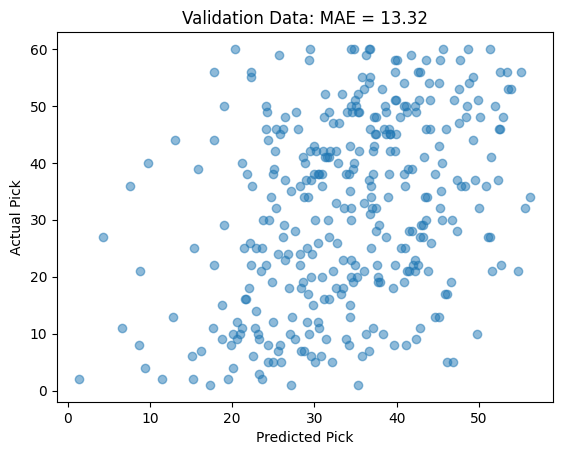

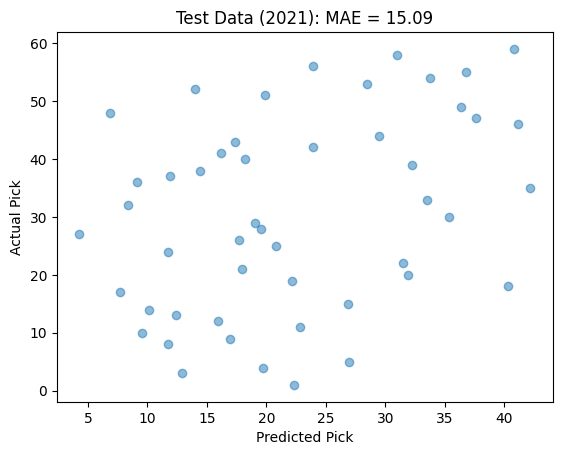

In [29]:
# Validation data
val_preds = ball_model.predict(val_XX)
val_mae = mean_absolute_error(val_preds, val_y)
plt.scatter(val_preds, val_y, alpha=0.5)
plt.xlabel('Predicted Pick')
plt.ylabel('Actual Pick')
plt.title('Validation Data: MAE = {:.2f}'.format(val_mae))
plt.show()

# Test data, using 2021
test_X_2021 = ball_data_2021[list(selected_feat)]
test_preds_2021 = ball_model.predict(test_X_2021)
test_mae_2021 = mean_absolute_error(test_preds_2021, ball_data_2021.pick)
plt.scatter(test_preds_2021, ball_data_2021.pick, alpha=0.5)
plt.xlabel('Predicted Pick')
plt.ylabel('Actual Pick')
plt.title('Test Data (2021): MAE = {:.2f}'.format(test_mae_2021))
plt.show()